In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
from tqdm import tqdm

import pandas
pandas.set_option('display.max_columns', None)

#import sys
#!{sys.executable} -m pip install scienceplots 

import scienceplots
plt.style.use(['science', 'notebook', 'grid']) 
plt.rcParams['figure.figsize'] = [8 , 8]

# Lecture 5

## Generate parameters in log-scale

In [2]:
def precision_round(number, digits=2):
    power = "{:e}".format(number).split('e')[1]
    return round(number, -(int(power) - digits))

### Tau

In [3]:
params = np.logspace(start=np.log10(5), stop=np.log10(30000), num=40)

for i in range(len(params)):
    params[i] = precision_round(params[i])
    
print(''.join(str(num)+', ' for num in params))

5.0, 6.25, 7.81, 9.76, 12.2, 15.3, 19.1, 23.8, 29.8, 37.2, 46.5, 58.2, 72.7, 90.9, 114.0, 142.0, 177.0, 222.0, 277.0, 346.0, 433.0, 541.0, 676.0, 845.0, 1060.0, 1320.0, 1650.0, 2060.0, 2580.0, 3220.0, 4030.0, 5040.0, 6290.0, 7870.0, 9830.0, 12300.0, 15400.0, 19200.0, 24000.0, 30000.0, 


### Age

In [4]:
params = np.logspace(start=np.log10(20), stop=3, num=10)
params = np.append(params, np.arange(1500, 13500, step=500))

for i in range(len(params)):
    params[i] = precision_round(params[i])
    
print(''.join(str(num)+', ' for num in params))

20.0, 30.9, 47.7, 73.7, 114.0, 176.0, 271.0, 419.0, 647.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0, 3500.0, 4000.0, 4500.0, 5000.0, 5500.0, 6000.0, 6500.0, 7000.0, 7500.0, 8000.0, 8500.0, 9000.0, 9500.0, 10000.0, 10500.0, 11000.0, 11500.0, 12000.0, 12500.0, 13000.0, 


## Analyze the input data

In [5]:
data = Table.read('SDSS_LAB2024_photometry.fits', format='fits')
data = data.to_pandas()
data

,id,ra,dec,redshift,sdss.up,sdss.up_err,sdss.gp,sdss.gp_err,sdss.rp,sdss.rp_err,sdss.ip,sdss.ip_err,sdss.zp,sdss.zp_err
0,1237657873254907919,140.153626,39.308208,0.028312,0.119670,0.020435,1.029917,0.012816,1.621148,0.022931,1.954847,0.023217,2.286192,0.059580
1,1237657873254973544,140.325684,39.456471,0.056195,0.091612,0.006626,0.247744,0.003121,0.358206,0.004741,0.453588,0.007278,0.492240,0.025029
2,1237654880726286453,190.287293,5.309674,0.074970,0.045000,0.004752,0.214703,0.004054,0.462379,0.007594,0.667785,0.011125,0.835854,0.022765
3,1237654880727728243,193.587524,5.282654,0.048760,0.466016,0.013479,1.720028,0.006990,2.967451,0.009481,4.098367,0.018062,4.911618,0.059197
4,1237654880728842356,196.179871,5.124015,0.054671,0.147323,0.008597,0.379945,0.003792,0.529207,0.006502,0.663836,0.009359,0.737546,0.032889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92478,1237654881812545849,219.128952,5.382636,0.029722,0.130263,0.007935,0.621287,0.008810,1.230597,0.015837,1.698397,0.020601,2.189831,0.033350
92479,1237654881814511891,223.538071,5.049211,0.028227,0.050782,0.006481,0.183128,0.002653,0.343451,0.003437,0.469283,0.005994,0.610483,0.021694
92480,1237651823782396044,214.389114,5.217847,0.079587,0.126914,0.013361,0.634937,0.021585,1.301933,0.033164,1.929476,0.038042,2.559679,0.063614
92481,1237651823782985830,215.724396,5.183447,0.056425,0.101443,0.014067,0.449638,0.008164,0.778556,0.010234,0.989564,0.016335,1.230477,0.053690


In [6]:
def Plot(row_index):
    row = data.T[row_index]
    x = np.array([3540, 4750, 6220, 7630, 9050])
    y = np.array([row['sdss.up'], row['sdss.gp'], row['sdss.rp'], row['sdss.ip'], row['sdss.zp']])
    y_err = np.array([row['sdss.up_err'], row['sdss.gp_err'], row['sdss.rp_err'], row['sdss.ip_err'], row['sdss.zp_err']])
    plt.errorbar(x, y, yerr=y_err, ls='--',  fmt='o', color='deepskyblue', ecolor='grey', capsize=4, capthick=2)
    plt.ylim(0)
    plt.xlabel('$\lambda [A]$')
    plt.ylabel('$f_\\nu$')

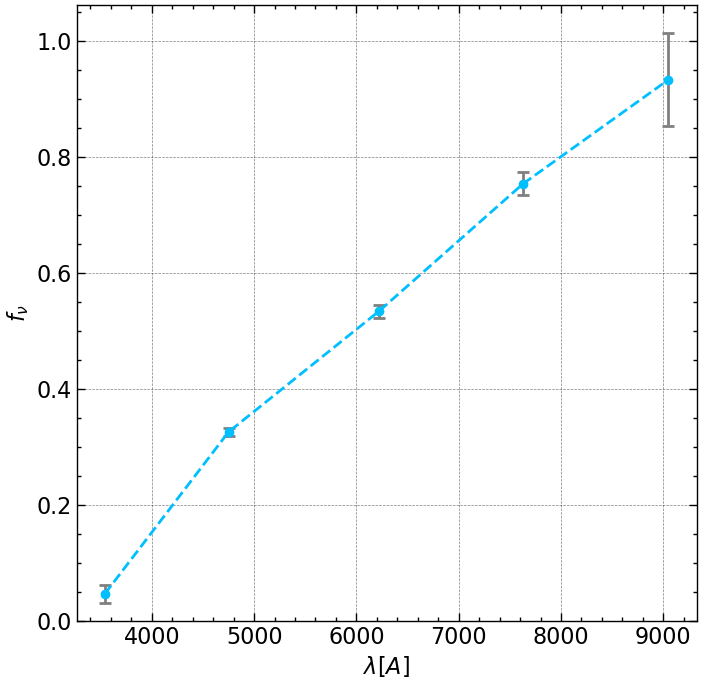

In [7]:
Plot(2000)

## Analyze the output data

In [8]:
results = Table.read('./out_full/results.fits', format='fits')
results = results.to_pandas()
results

,id,bayes.sfh.sfr,bayes.sfh.sfr_err,bayes.sfh.sfr100Myrs,bayes.sfh.sfr100Myrs_err,bayes.sfh.sfr10Myrs,bayes.sfh.sfr10Myrs_err,bayes.sdss.gp,bayes.sdss.gp_err,bayes.sdss.ip,bayes.sdss.ip_err,bayes.sdss.rp,bayes.sdss.rp_err,bayes.sdss.up,bayes.sdss.up_err,bayes.sdss.zp,bayes.sdss.zp_err,best.chi_square,best.reduced_chi_square,best.attenuation.B_B90,best.attenuation.E_BVs.nebular.continuum_old,best.attenuation.E_BVs.nebular.continuum_young,best.attenuation.E_BVs.nebular.lines_old,best.attenuation.E_BVs.nebular.lines_young,best.attenuation.E_BVs.stellar.old,best.attenuation.E_BVs.stellar.young,best.attenuation.FUV,best.attenuation.V_B90,best.attenuation.ebvs_old_factor,best.attenuation.powerlaw_slope,best.attenuation.uv_bump_amplitude,best.attenuation.uv_bump_wavelength,best.attenuation.uv_bump_width,best.nebular.f_dust,best.nebular.f_esc,best.nebular.lines_width,best.nebular.logU,best.nebular.ne,best.nebular.zgas,best.sfh.age,best.sfh.burst_age,best.sfh.f_burst,best.sfh.tau_burst,best.sfh.tau_main,best.stellar.age_m_star,best.stellar.imf,best.stellar.metallicity,best.stellar.old_young_separation_age,best.universe.age,best.universe.luminosity_distance,best.universe.redshift,best.attenuation.nebular.continuum_old,best.attenuation.nebular.continuum_young,best.attenuation.nebular.lines_old,best.attenuation.nebular.lines_young,best.attenuation.stellar.old,best.attenuation.stellar.young,best.dust.luminosity,best.sfh.integrated,best.sfh.sfr,best.sfh.sfr100Myrs,best.sfh.sfr10Myrs,best.stellar.lum,best.stellar.lum_ly,best.stellar.lum_ly_old,best.stellar.lum_ly_young,best.stellar.lum_old,best.stellar.lum_young,best.stellar.m_gas,best.stellar.m_gas_old,best.stellar.m_gas_young,best.stellar.m_star,best.stellar.m_star_old,best.stellar.m_star_young,best.stellar.n_ly,best.stellar.n_ly_old,best.stellar.n_ly_young,best.sdss.up,best.sdss.gp,best.sdss.rp,best.sdss.ip,best.sdss.zp
0,1237657873254907919,0.024257,0.148864,0.034852,0.180222,0.024923,0.150864,0.813277,0.064224,1.966500,0.049148,1.459651,0.023274,0.161777,0.016154,2.532923,0.126091,7.830311,1.957578,1.331683,0.264,0.60,0.264,0.60,0.264,0.60,2.621240,1.072804,0.44,0.0,0.0,217.5,35.0,0.0,0.0,300.0,-2.0,100.0,0.02,647.0,20.0,0.0,0.1,46.5,600.703624,1.0,0.02,10.0,13368.111980,3.803276e+24,0.028312,5.055656e+32,1.299495e+31,1.112661e+33,2.733061e+31,2.468935e+36,2.327126e+32,2.470826e+36,5.658388e+09,1.114690e-04,3.891712e-04,1.230300e-04,5.279591e+36,3.974634e+33,3.919185e+33,5.544877e+31,5.279295e+36,2.953351e+32,2.062985e+09,2.062985e+09,7.630566e+01,3.595402e+09,3.595401e+09,1.153994e+03,7.954457e+50,7.786732e+50,1.677245e+49,0.163447,0.855873,1.471915,1.969252,2.509335
1,1237657873254973544,1.703986,1.943519,2.361601,3.351815,1.720523,1.963627,0.242112,0.012637,0.443666,0.014797,0.344725,0.011248,0.093262,0.009139,0.522656,0.030554,0.118907,0.029727,0.249372,0.044,0.10,0.044,0.10,0.044,0.10,0.737715,0.193441,0.44,0.0,0.0,217.5,35.0,0.0,0.0,300.0,-2.0,100.0,0.02,1500.0,20.0,0.0,0.1,541.0,1042.152363,1.0,0.02,10.0,13003.015620,7.708407e+24,0.056195,1.829330e+32,2.316632e+34,4.615793e+32,5.564139e+34,4.149507e+35,4.743766e+35,9.687794e+35,3.278326e+09,4.043335e-01,4.437052e-01,4.077165e-01,3.973401e+36,1.988034e+35,3.698753e+33,1.951046e+35,2.966458e+36,1.006943e+36,1.277028e+09,1.276785e+09,2.426724e+05,2.001298e+09,1.997463e+09,3.834491e+06,5.996591e+52,8.757685e+50,5.909014e+52,0.091143,0.253507,0.362687,0.441209,0.500566
2,1237654880726286453,0.912346,1.924841,0.939005,1.961911,0.914507,1.927816,0.207874,0.011325,0.654413,0.019171,0.456883,0.019417,0.044528,0.005430,0.878735,0.046464,0.082754,0.020689,0.770858,0.154,0.35,0.154,0.35,0.154,0.35,1.555298,0.623578,0.44,0.0,0.0,217.5,35.0,0.0,0.0,300.0,-2.0,100.0,0.02,1500.0,20.0,0.0,0.1,46.5,1453.856923,1.0,0.02,10.0,12764.994344,1.042477e+25,0.074970,1.652499e+33,4.475367e+23,3.824081e+33,9.634630e+23,2.570888e+36,8.364153e+24,2.576364e+36,1.980224e+10,4.211531e-12,1.470370e-11,4.648328e-12,9.388564e+36,1.550025e+34,1.550025e+34,2.094970e+

In [9]:
def Plot(x_data, y_data, x_label='', y_label='', xbins=20, x_min=None, x_max=None, y_min=None, y_max=None, xlog=True, ylog=True):
    plt.rcParams['figure.figsize'] = [16 , 8]
    fig, axes = plt.subplots(1, 2)
    
    if x_min==None: x_min = np.min(x_data)
    if x_max==None: x_max = np.max(x_data)
    if y_min==None: y_min = np.min(y_data)
    if y_max==None: y_max = np.max(y_data)


    # First Plot
    ax = axes[0]
    ax.set_title(f'Means of {int(xbins)} log-spaced bins')
    bin_edges = np.logspace(start=np.log10(x_min), stop=np.log10(x_max), num=xbins+1)
    statistics = np.zeros(shape=(int(xbins), 5))
    
    for i in range(int(xbins)):
        mask_bin = ((x_data>=bin_edges[i]) & (x_data<bin_edges[i+1]))
        x_temp = np.array(x_data[mask_bin])
        y_temp = np.array(y_data[mask_bin])
        N_temp = int(len(x_temp))
        statistics[i] = np.array([N_temp, 
                                  np.mean(x_temp), 
                                  np.std(x_temp, ddof=1)/np.sqrt(N_temp), 
                                  np.mean(y_temp), 
                                  np.std(y_temp, ddof=1)/np.sqrt(N_temp)])

    ax.errorbar(x=statistics[:,1], 
                y=statistics[:,3], 
                xerr=statistics[:,2], 
                yerr=statistics[:,4], 
                fmt='.', color='blue', ecolor='grey', capsize=4, capthick=1)
    
    x_min_bins = np.min(statistics[:,1])
    x_max_bins = np.max(statistics[:,1])
    y_min_bins = np.min(statistics[:,3])
    y_max_bins = np.max(statistics[:,3])
    
    if xlog==True: 
        ax.set_xscale('log')
        ax.set_xlim(0.5*x_min_bins, 1.5*x_max_bins)
    else: 
        ax.set_xlim(0.99*x_min_bins, 1.01*x_max_bins)
        
    if ylog==True: 
        ax.set_yscale('log')
        ax.set_ylim(0.5*y_min_bins, 1.5*y_max_bins)
    else:
        ax.set_ylim(0.95*y_min_bins, 1.05*y_max_bins)
    
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)


    # Second Plot
    ax = axes[1]
    ax.set_title(f'2-D histogram of the data')
    binx = np.logspace(start=np.log10(x_min), stop=np.log10(x_max), num=200)
    biny = np.logspace(start=np.log10(y_min), stop=np.log10(y_max), num=200)
    hist = ax.hist2d(x_data, y_data, bins=(binx, biny), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
    
    if xlog==True: ax.set_xscale('log')
    if ylog==True: ax.set_yscale('log')
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    cax = fig.add_axes([0.91, 0.11, 0.02, 0.77])
    fig.colorbar(hist[3], cax=cax)
    
    
    plt.show()
    
    return fig, axes, statistics

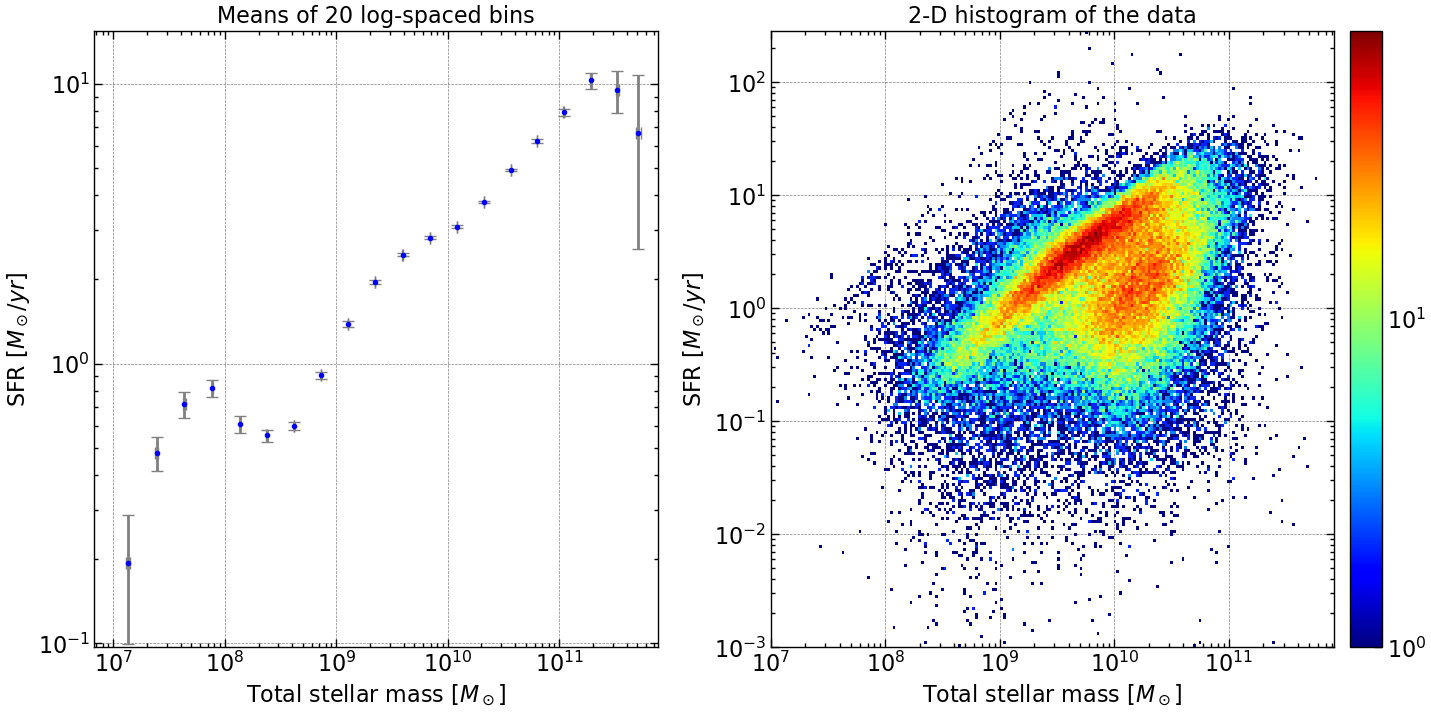

bins occupation = [    9    28    41   152   495  1117  2327  3662  5655  8113 10773 13818
 16417 14943  9293  4121  1195   243    42     3]


In [10]:
x_data = results['best.stellar.m_star']
y_data = results['bayes.sfh.sfr10Myrs']

fig, ax, statistics = Plot(x_data, y_data, 'Total stellar mass $[M_\odot]$', 'SFR $[M_\odot/yr]$', xbins=20, x_min=1e7, y_min=1e-3);
print(f'bins occupation = {statistics[:,0].astype(int)}')

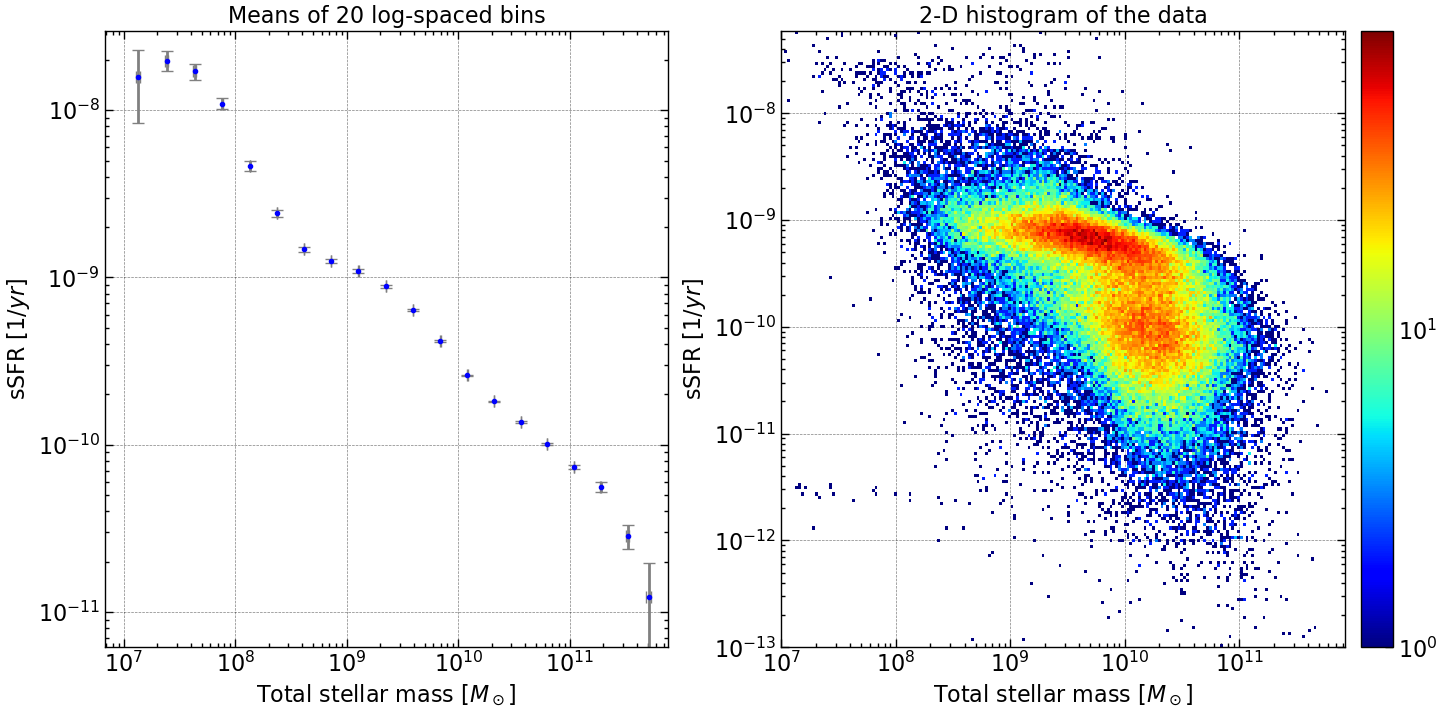

bins occupation = [    9    28    41   152   495  1117  2327  3662  5655  8113 10773 13818
 16417 14943  9293  4121  1195   243    42     3]


In [11]:
x_data = results['best.stellar.m_star']
y_data = results['bayes.sfh.sfr10Myrs']/results['best.stellar.m_star']
    
fig, ax, statistics = Plot(x_data, y_data, 'Total stellar mass $[M_\odot]$', 'sSFR $[1/yr]$', xbins=20, x_min=1e7, y_min=1e-13);
print(f'bins occupation = {statistics[:,0].astype(int)}')

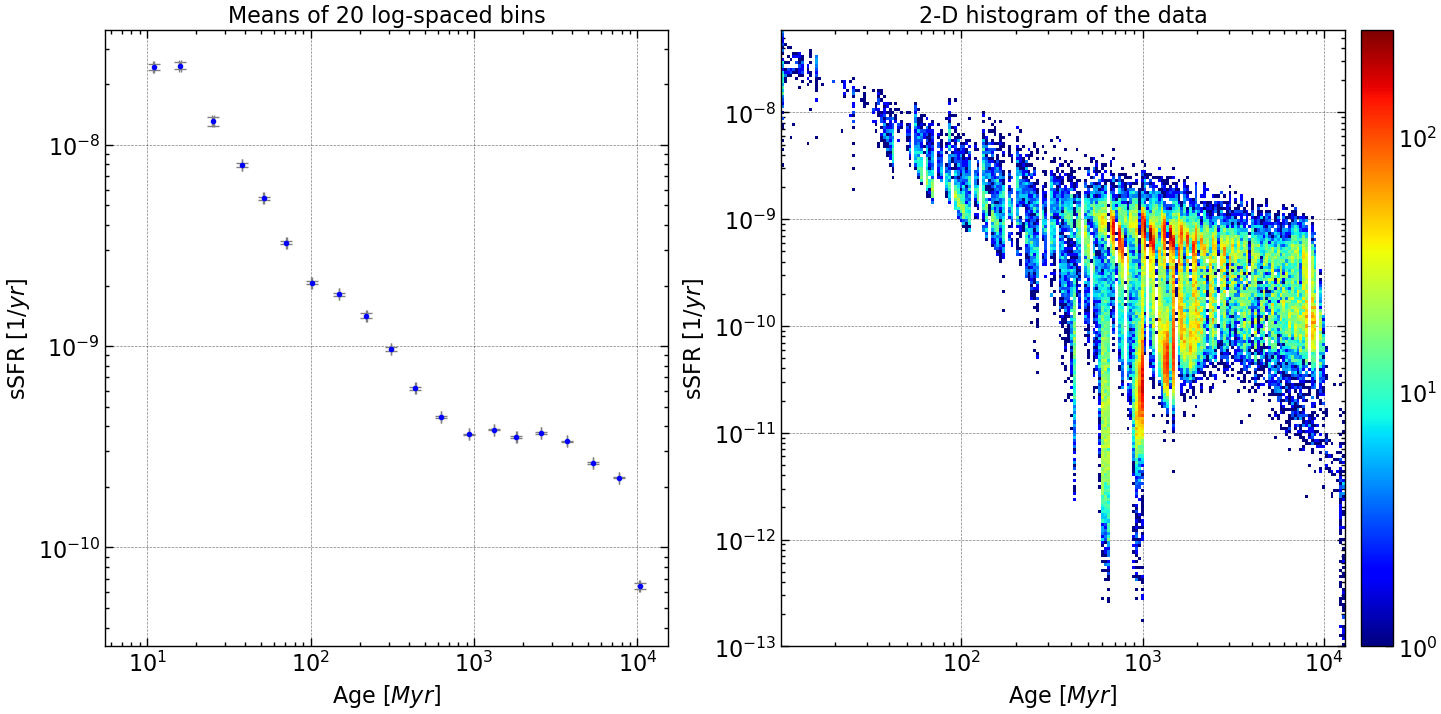

bins occupation = [  215    47    51   165   380   846  1053  1350   915  1123  2640  8471
 16953 19122 13951  6830  5102  4731  7800   738]


In [47]:
x_data = results['best.stellar.age_m_star']
y_data = results['bayes.sfh.sfr10Myrs']/results['best.stellar.m_star']
    
fig, ax, statistics = Plot(x_data, y_data, 'Age $[Myr]$', 'sSFR $[1/yr]$', xbins=20, y_min=1e-13);
print(f'bins occupation = {statistics[:,0].astype(int)}')

## Prof Results

In [13]:
#prof_results = Table.read('SDSS_LAB2024_PROFresults.fits', format='fits')
#prof_results = prof_results.to_pandas()
#prof_results

In [14]:
#x_data = prof_results['bayes_stellar_m_star']
#y_data = prof_results['bayes_sfh_sfr']
#
#Plot(x_data, y_data, [1,12], [-4,3], 'Total stellar mass $[M_\odot]$', 'SFR $[M_\odot/yr]$')

# Lecture 6

## Main Sequence

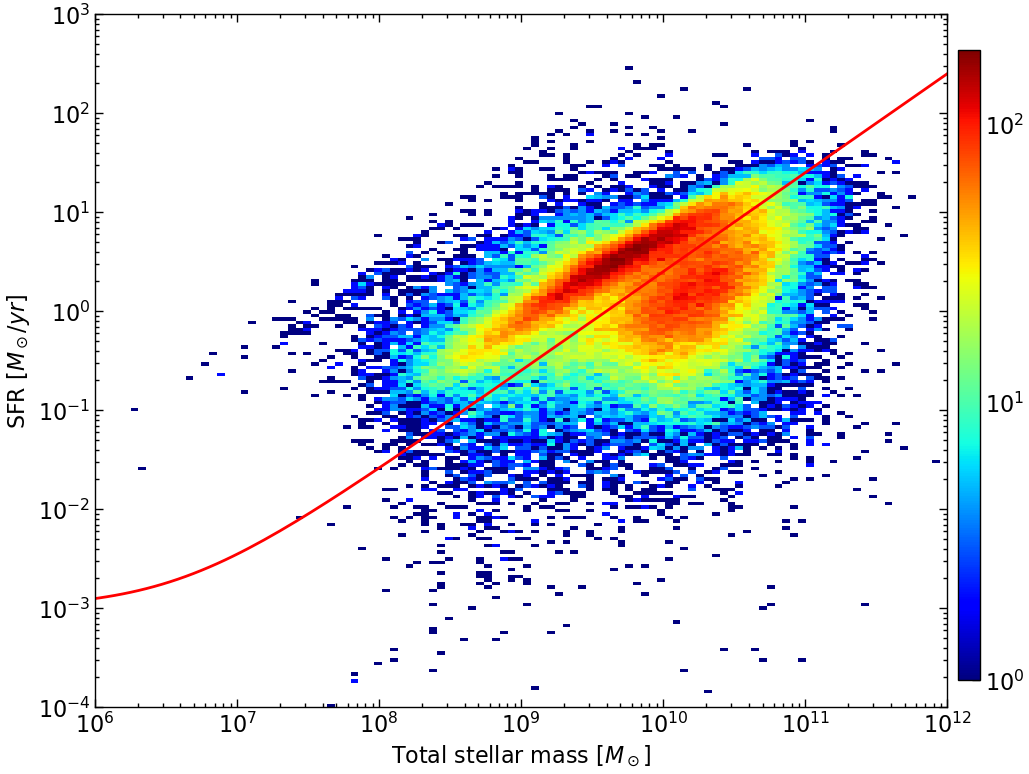

In [15]:
x_data = results['best.stellar.m_star']
y_data = results['bayes.sfh.sfr10Myrs']

#plt.rcParams['figure.figsize'] = [10 , 16]
fig = plt.figure(figsize=(11, 9))

#fig, axes = plt.subplots(0)
#ax = axes[0]
binx = np.logspace(start=1, stop=12, num=200)
biny = np.logspace(start=-4, stop=3, num=200)
hist = plt.hist2d(x_data, y_data, bins=(binx, biny), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
#x = np.linspace(10**6, 10**12, 1000)
y = binx*10**(-9.6)  + 10**(-3)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e6)
plt.ylim(1e-4, 1e3)
plt.xlabel('Total stellar mass $[M_\odot]$')
plt.ylabel('SFR $[M_\odot/yr]$')
plt.grid()

plt.plot(binx, y, color = "red")

cax = fig.add_axes([0.91, 0.14, 0.02, 0.7])
fig.colorbar(hist[3], cax=cax)


Now let's get the number of galaxies above and below the line and compute their fraction, in function of mass

fraction = []
x_data = np.array(x_data)
for i in range(len(binx)):
    print(binx[i])
    mask_x = np.logical_and(x_data > binx[i],  x_data <= binx[i+1])

    print(mask_x)
    y_bin = y_data[mask_x]
    above = 0
    below = 0
    for j in range(len(y_bin)):
        if y_bin[j] > y[j]:
            above = above +1
        else:
            below = below + 1
            
    if (below == 0):
        fraction.append(above/1)
    else:
        fraction.append(above/below)  

In [16]:
print(binx)

[1.00000000e+01 1.13573336e+01 1.28989026e+01 1.46497140e+01
 1.66381689e+01 1.88965234e+01 2.14614120e+01 2.43744415e+01
 2.76828663e+01 3.14403547e+01 3.57078596e+01 4.05546074e+01
 4.60592204e+01 5.23109931e+01 5.94113398e+01 6.74754405e+01
 7.66341087e+01 8.70359136e+01 9.88495905e+01 1.12266777e+02
 1.27505124e+02 1.44811823e+02 1.64467618e+02 1.86791360e+02
 2.12145178e+02 2.40940356e+02 2.73644000e+02 3.10786619e+02
 3.52970730e+02 4.00880633e+02 4.55293507e+02 5.17092024e+02
 5.87278661e+02 6.66991966e+02 7.57525026e+02 8.60346442e+02
 9.77124154e+02 1.10975250e+03 1.26038293e+03 1.43145894e+03
 1.62575567e+03 1.84642494e+03 2.09704640e+03 2.38168555e+03
 2.70495973e+03 3.07211300e+03 3.48910121e+03 3.96268864e+03
 4.50055768e+03 5.11143348e+03 5.80522552e+03 6.59318827e+03
 7.48810386e+03 8.50448934e+03 9.65883224e+03 1.09698580e+04
 1.24588336e+04 1.41499130e+04 1.60705282e+04 1.82518349e+04
 2.07292178e+04 2.35428641e+04 2.67384162e+04 3.03677112e+04
 3.44896226e+04 3.917101

## Galaxy Environment

In [17]:
from astropy.coordinates import FK5, SkyCoord
import astropy.constants as astroconst
from astropy.cosmology import Planck18 as cosmo
from astropy import units as u

In [18]:
# We need to reopen the .fits file, since Astropy doesn't like that we converted it to a Pandas dataframe
data = Table.read('SDSS_LAB2024_photometry.fits', format='fits') 

In [19]:
c = astroconst.c #m/s
c_km_s = c*u.km/(1000*u.m)
print(c_km_s)

299792.458 km / s


In [20]:
radius = 500*u.kpc
depth = 500*u.km/u.s

In [21]:
# Whether to run this cell or not (it takes a while)
# The results of this cell are already in SDSS_environment.fits (used in the cell below)
compute_surface_density = False

#-----------------------------------------------------
if compute_surface_density:

    NEIcoords = SkyCoord(ra=data['ra']*u.deg, dec=data['dec']*u.deg)
    NEIredshift = data['redshift']

    n_galaxies_cyl = np.zeros(len(data['id']))

    for gal in tqdm(range(0, len(data['id']))):
        PRIcoords = SkyCoord(ra=data['ra'][gal]*u.deg, dec=data['dec'][gal]*u.deg)
        PRIredshift = data['redshift'][gal]
        
        # Obtain a separation of all galaxies from the primary in units of arcseconds
        Separation = NEIcoords.separation(PRIcoords).to(u.arcsec)
        # Convert it to kpc 
        ang_1kpc = cosmo.arcsec_per_kpc_proper(PRIredshift)
        Separation = Separation/ang_1kpc
        
        # Now we also want the separation in velocity (in km/s)
        Sep_vel = (NEIredshift-PRIredshift)*c_km_s / (1+PRIredshift)
        
        # Define the cylinder
        mask_base = Separation < radius
        mask_depth = (Sep_vel < depth) & (Sep_vel > - depth)
        
        mask_cylinder = mask_base & mask_depth
        n_galaxies_cyl[gal] = mask_cylinder.sum()
        
    surface_density = n_galaxies_cyl / (np.pi*radius**2)
    print(surface_density) # ".value" to remove the Astropy units

In [22]:
# Export the surface-density values
#tabout = Table((data['id'], data['ra'], data['dec'], surface_density), names=('id', 'ra', 'dec', 'surface_density'))
#tabout.write('SDSS_environment.fits', overwrite=True)

In [23]:
# Import the surface-density values
surface_density = np.array(Table.read('SDSS_environment.fits', format='fits')['surface_density'], dtype='float')
surface_density

array([6.36619772e-06, 1.27323954e-06, 1.27323954e-06, ...,
       2.54647909e-06, 1.27323954e-06, 2.54647909e-06])

## Plot

Text(0.5, 0, 'density')

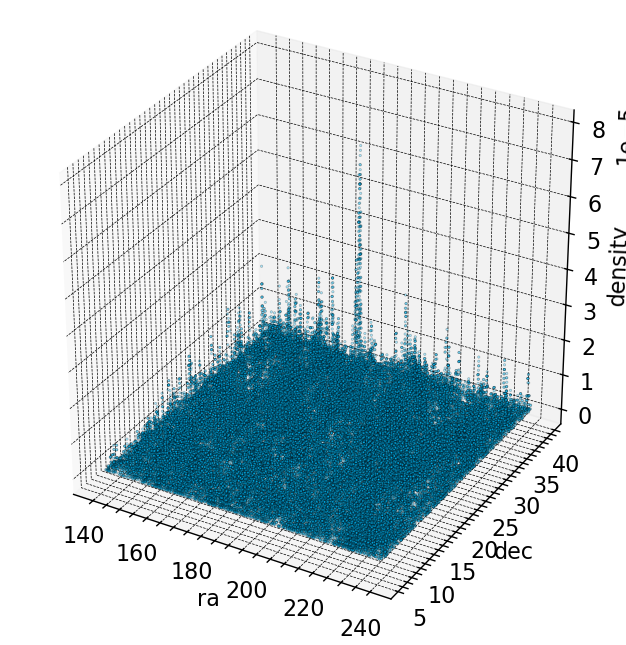

In [24]:
fig, ax = plt.subplots(subplot_kw={'projection':'3d'})

ax.set_box_aspect([1, 1, 1])

ax.scatter(data['ra'], data['dec'], surface_density, 'o', s=3, edgecolor='black', linewidth=0.4, color='deepskyblue', alpha=0.3)

ax.set_xlabel('ra')
ax.set_ylabel('dec')
ax.set_zlabel('density')

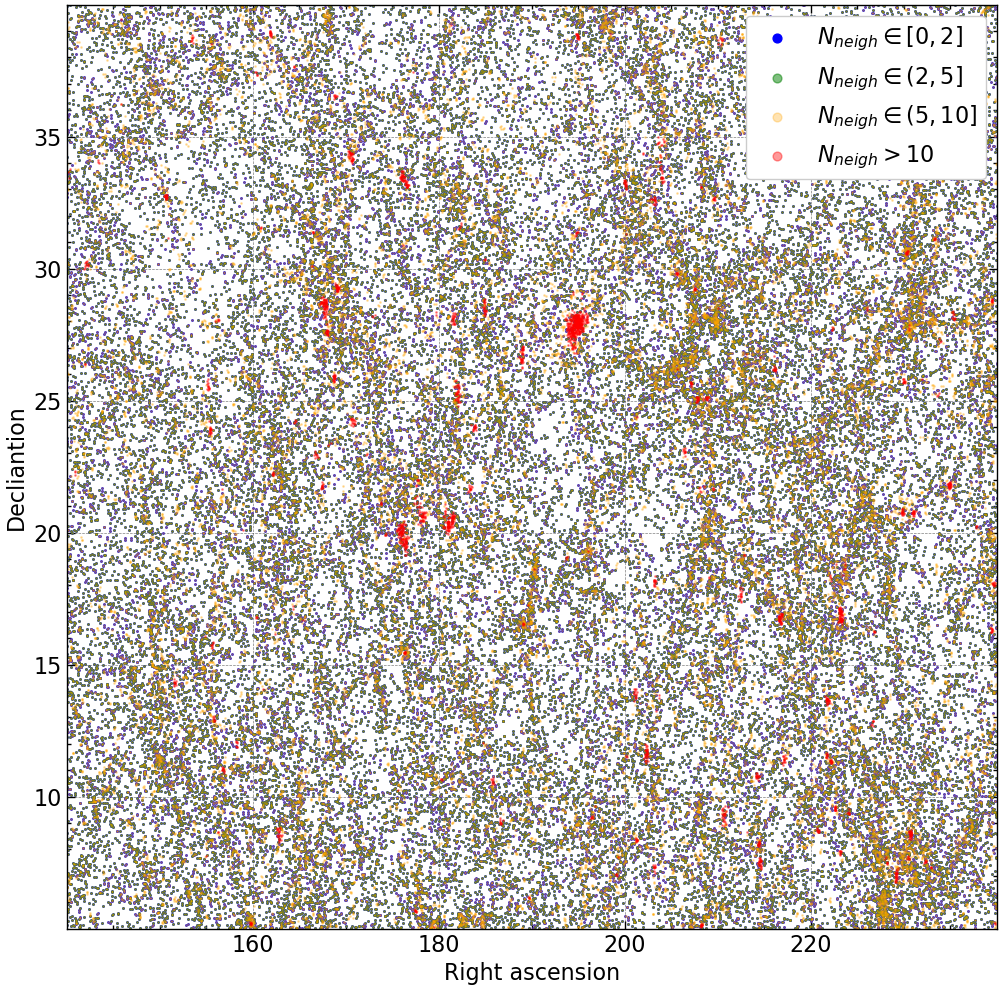

In [25]:
n_galaxies_cyl = surface_density*np.pi*radius.value**2

plt.figure(figsize=(12,12))

mask = n_galaxies_cyl<=2
plt.scatter(data['ra'][mask], data['dec'][mask], s=1, color='blue', alpha=1, label='$N_{neigh} \in [0,2]$')

mask = np.logical_and(n_galaxies_cyl<2, n_galaxies_cyl<=5)
plt.scatter(data['ra'][mask], data['dec'][mask], s=1, color='green', alpha=0.5, label='$N_{neigh} \in (2,5]$')

mask = np.logical_and(n_galaxies_cyl<5, n_galaxies_cyl<=10)
plt.scatter(data['ra'][mask], data['dec'][mask], s=1, color='orange', alpha=0.3, label='$N_{neigh} \in (5,10]$')

mask = n_galaxies_cyl>10
plt.scatter(data['ra'][mask], data['dec'][mask], s=1, color='red', alpha=0.4, label='$N_{neigh} > 10$')

plt.xlim(np.min(data['ra']), np.max(data['ra']))
plt.ylim(np.min(data['dec']), np.max(data['dec']))
plt.xlabel('Right ascension')
plt.ylabel('Decliantion')
lgnd = plt.legend(loc='upper right')
for marker in lgnd.legend_handles:
    marker._sizes = [40]

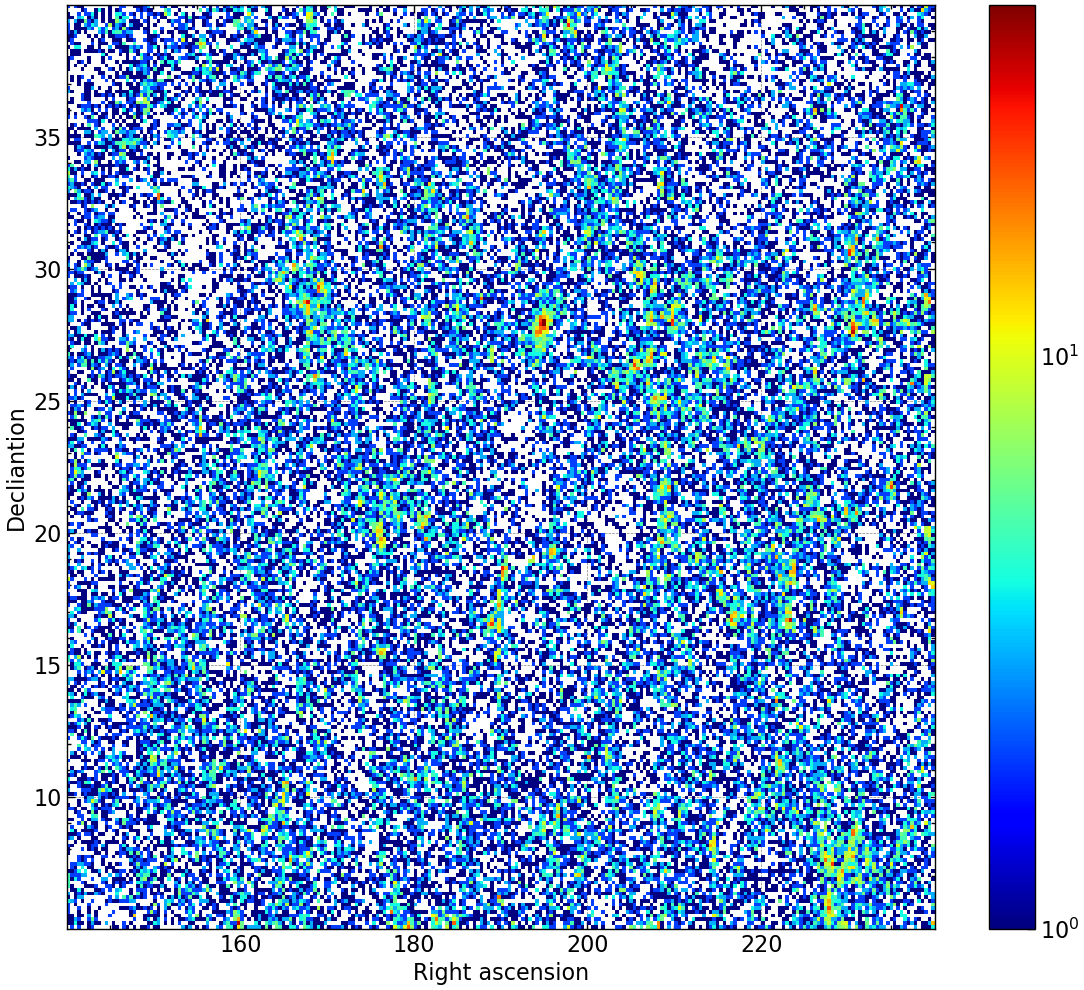

In [26]:
plt.figure(figsize=(14,12))

hist = plt.hist2d(data['ra'], data['dec'], bins=(250, 250), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
plt.xlabel('Right ascension')
plt.ylabel('Decliantion')
fig.colorbar(hist[3])

### Dependencies

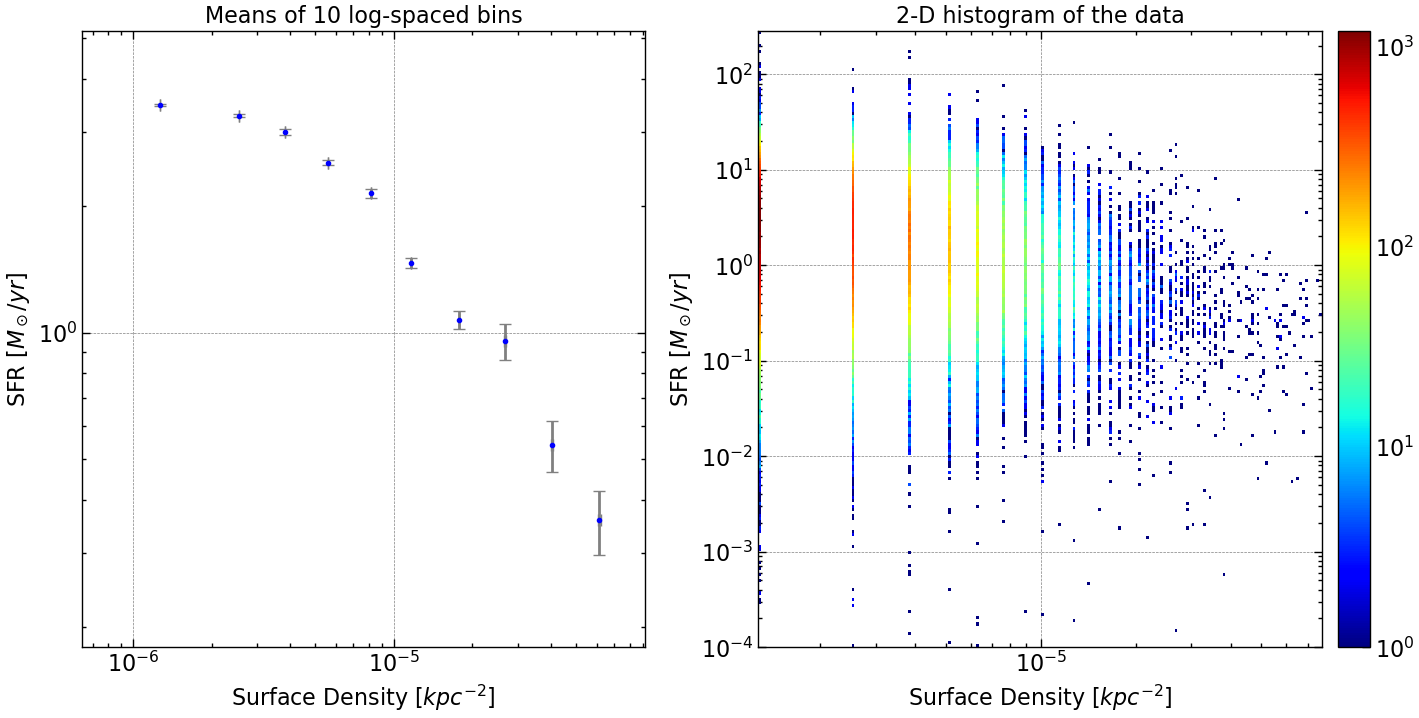

bins occupation = [42840 20133 10439  9998  4193  3102  1167   403   143    64]


In [27]:
x_data = surface_density
y_data = results['bayes.sfh.sfr10Myrs']

fig, ax, statistics = Plot(x_data, y_data, 'Surface Density $[kpc^{-2}]$', 'SFR $[M_\odot/yr]$', xbins=10, y_min=1e-4);
print(f'bins occupation = {statistics[:,0].astype(int)}')

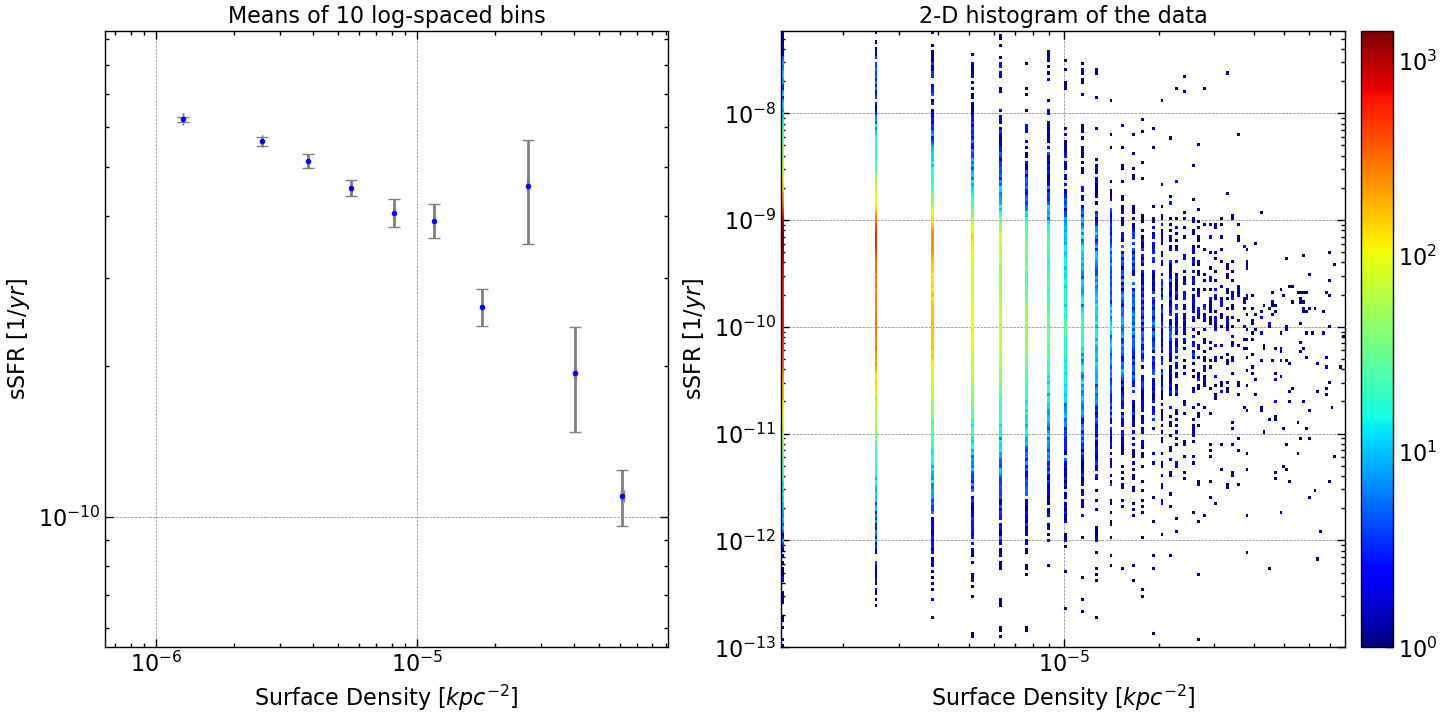

bins occupation = [42840 20133 10439  9998  4193  3102  1167   403   143    64]


In [28]:
x_data = surface_density
y_data = results['bayes.sfh.sfr10Myrs']/results['best.stellar.m_star']

fig, ax, statistics = Plot(x_data, y_data, 'Surface Density $[kpc^{-2}]$', 'sSFR $[1/yr]$', xbins=10, y_min=1e-13);
print(f'bins occupation = {statistics[:,0].astype(int)}')

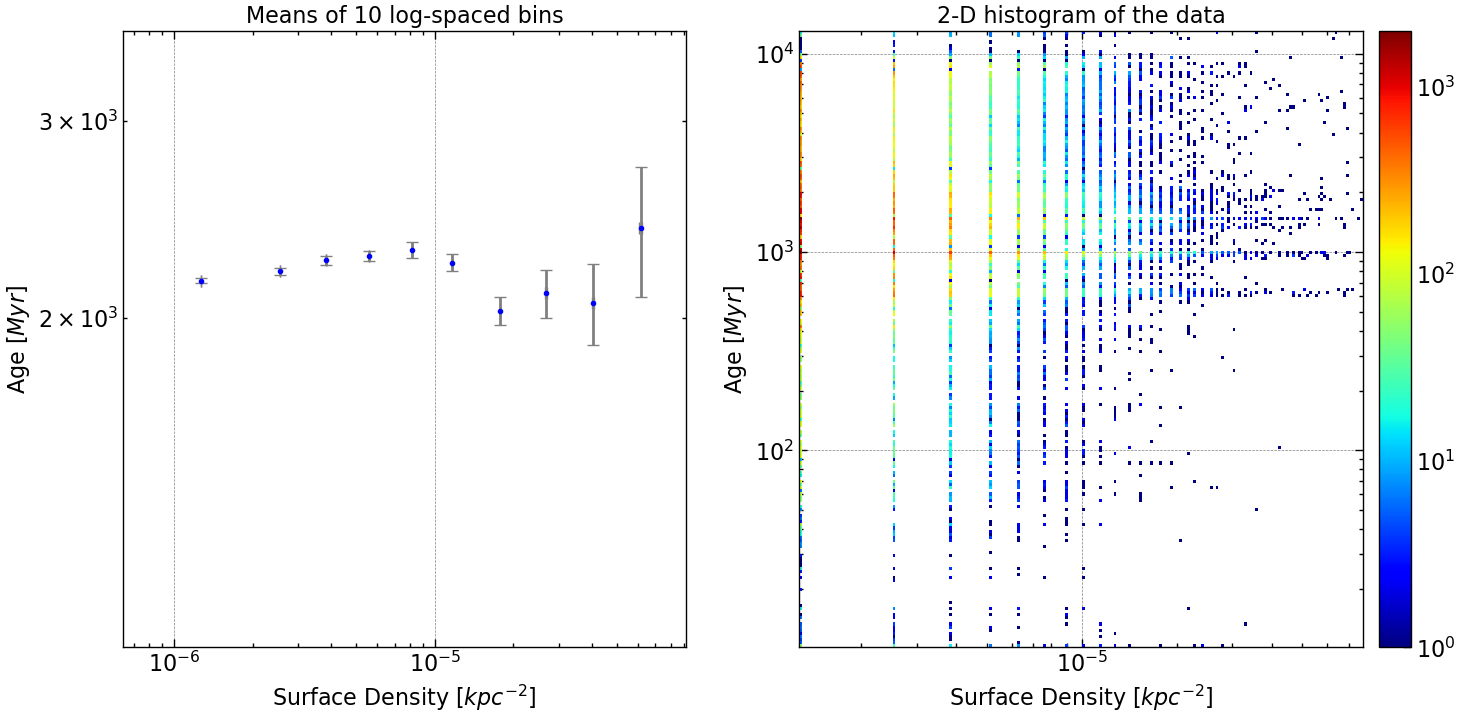

bins occupation = [42840 20133 10439  9998  4193  3102  1167   403   143    64]


In [29]:
x_data = surface_density
y_data = results['best.stellar.age_m_star']

fig, ax, statistics = Plot(x_data, y_data, 'Surface Density $[kpc^{-2}]$', 'Age $[Myr]$', xbins=10);
print(f'bins occupation = {statistics[:,0].astype(int)}')

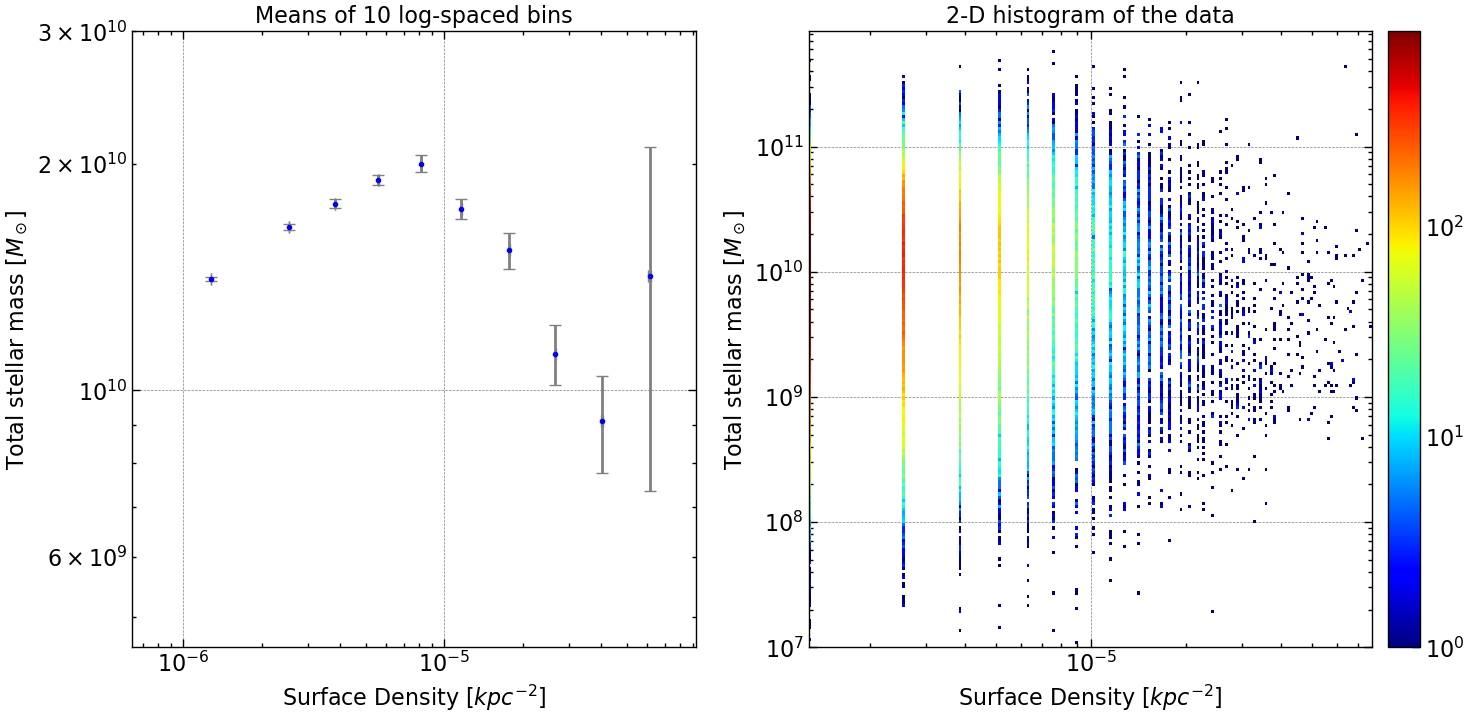

bins occupation = [42840 20133 10439  9998  4193  3102  1167   403   143    64]


In [30]:
x_data = surface_density
y_data = results['best.stellar.m_star']

fig, ax, statistics = Plot(x_data, y_data, 'Surface Density $[kpc^{-2}]$', 'Total stellar mass $[M_\odot]$', xbins=10, y_min=1e7);
print(f'bins occupation = {statistics[:,0].astype(int)}')

# Lecture 7

## Metallicity

In [31]:
data = Table.read('SDSS_LAB2024_spectroscopy.fits', format='fits')
data = data.to_pandas()
data

,id,Ra,Dec,SpecObjID,oii_3726_flux,oii_3726_flux_err,oii_3729_flux,oii_3729_flux_err,h_beta_flux,h_beta_flux_err,oiii_5007_flux,oiii_5007_flux_err,h_alpha_flux,h_alpha_flux_err,nii_6584_flux,nii_6584_flux_err,sii_6717_flux,sii_6717_flux_err,sii_6731_flux,sii_6731_flux_err,log_oh
0,1237657873254907919,140.153626,39.308208,1056110100969711616,101.519500,7.398387,140.663100,7.543258,151.599239,4.972585,104.966700,3.483613,454.801161,5.767852,127.769300,2.672537,106.806100,2.863982,73.735440,2.606843,8.734623
1,1237657873254973544,140.325684,39.456471,1056110375847618560,38.902310,4.698286,43.133400,4.939773,54.816254,4.419355,18.775540,2.549214,129.358509,2.765097,35.350590,1.867918,29.757880,1.816272,19.586350,1.636298,8.811741
2,1237654880726286453,190.287293,5.309674,952651549304186880,10.251290,4.456565,27.182910,4.610123,51.681798,15.083097,23.813960,2.912106,63.133956,5.142882,17.806730,2.474831,14.909740,2.595782,4.719933,3.016939,-9999.000000
3,1237654880727728243,193.587524,5.282654,954879439135598592,17.041710,7.241267,29.625190,7.116340,107.328879,18.837620,29.908130,4.471506,150.623169,9.592171,69.223010,5.355443,27.537210,4.663846,16.293380,4.523975,-9999.000000
4,1237654880728842356,196.179871,5.124015,956053988573210624,88.530870,4.791603,100.263500,4.959826,114.449956,3.808321,55.175960,2.417139,257.938248,3.805013,54.351610,1.815738,55.005020,1.858351,38.263330,1.633464,8.746394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92478,1237654881812545849,219.128952,5.382636,2058168727995705344,6.568196,5.159519,4.854383,5.068860,53.910157,24.596951,-2.758879,2.225314,60.120945,9.137989,-0.470011,1.846521,1.097325,2.058043,-2.535174,1.943148,-9999.000000
92479,1237654881814511891,223.538071,5.049211,2060422194793572352,0.526393,8.585512,-1.139811,8.454541,15.348567,-777.892867,1.975070,2.705857,19.204711,5.814079,0.766059,1.707300,0.104225,1.906676,-1.965431,2.169719,-9999.000000
92480,1237651823782396044,214.389114,5.217847,656554436428064768,23.171340,4.409194,29.234810,4.638111,74.191878,7.748188,17.575280,3.023975,171.301288,5.229351,74.111350,3.562458,24.082720,3.581982,18.650090,3.400767,-9999.000000
92481,1237651823782985830,215.724396,5.183447,657669890873780224,74.059460,4.793346,59.283220,4.838350,169.463578,4.029014,31.102540,2.454101,571.920179,5.911172,228.338300,3.343860,82.110980,2.359019,69.968430,2.290802,9.109709


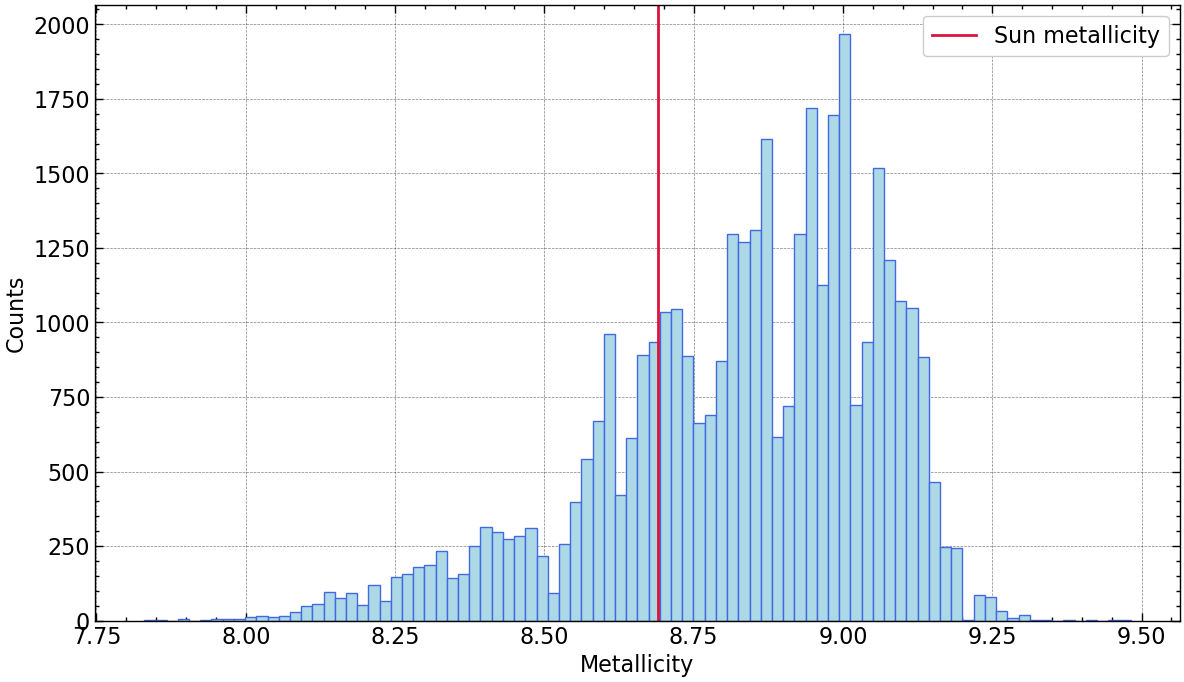

In [32]:
from astropy.visualization.hist import hist as fancyhist

mask = data['log_oh']>-4

plt.figure(figsize=(14,8))
fancyhist(data['log_oh'][mask], bins="freedman", color='lightblue', edgecolor='royalblue');
#plt.hist(data['log_oh'][mask], bins=70, color='lightblue', edgecolor='royalblue');
plt.axvline(8.69, color='crimson', label='Sun metallicity')
plt.xlabel('Metallicity')
plt.ylabel('Counts')
plt.legend();

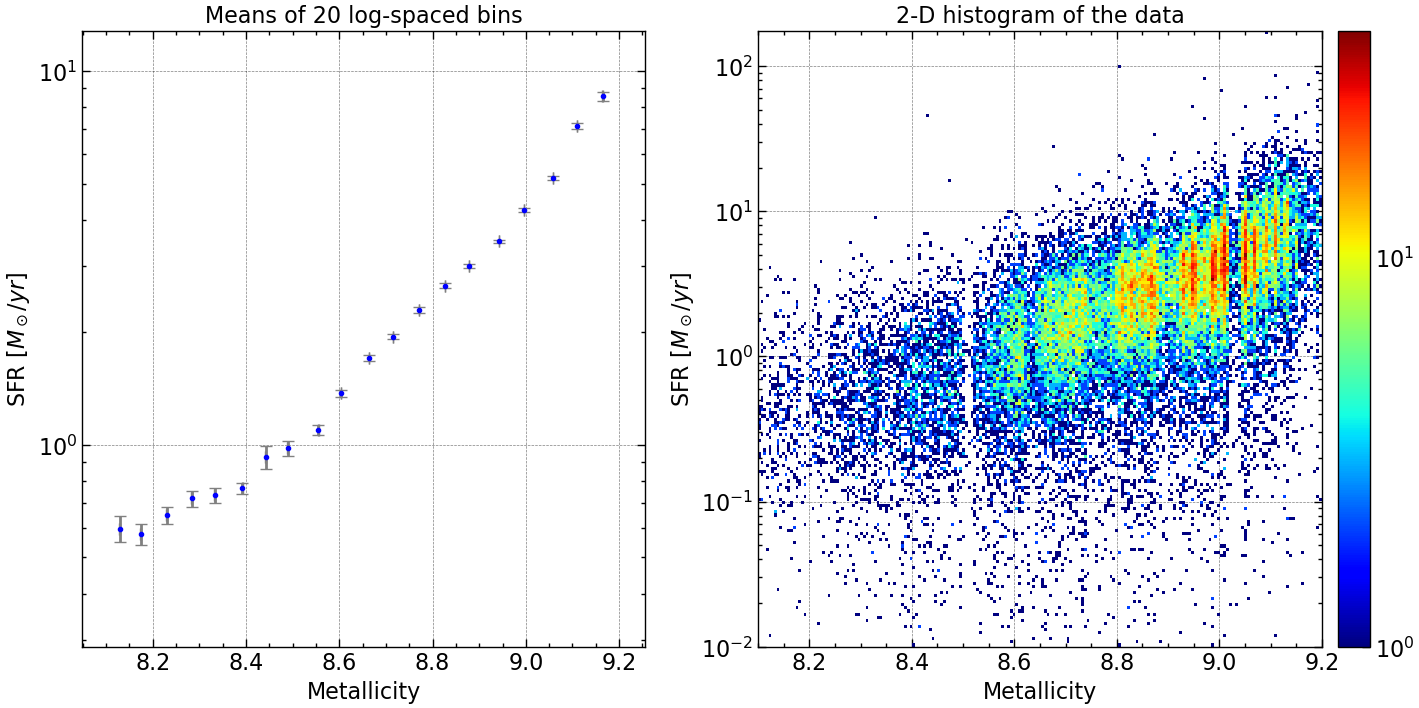

bins occupation = [ 192  204  293  476  525  724  815  594 1109 2096 2170 3043 2066 3798
 3192 3928 4778 3529 3158 1001]


In [33]:
x_data = data['log_oh'][mask]
y_data = results['bayes.sfh.sfr10Myrs'][mask]

fig, ax, statistics = Plot(x_data, y_data, 'Metallicity', 'SFR $[M_\odot/yr]$', xbins=20, x_min=8.1, x_max=9.2, y_min=1e-2, xlog=False);
print(f'bins occupation = {statistics[:,0].astype(int)}')

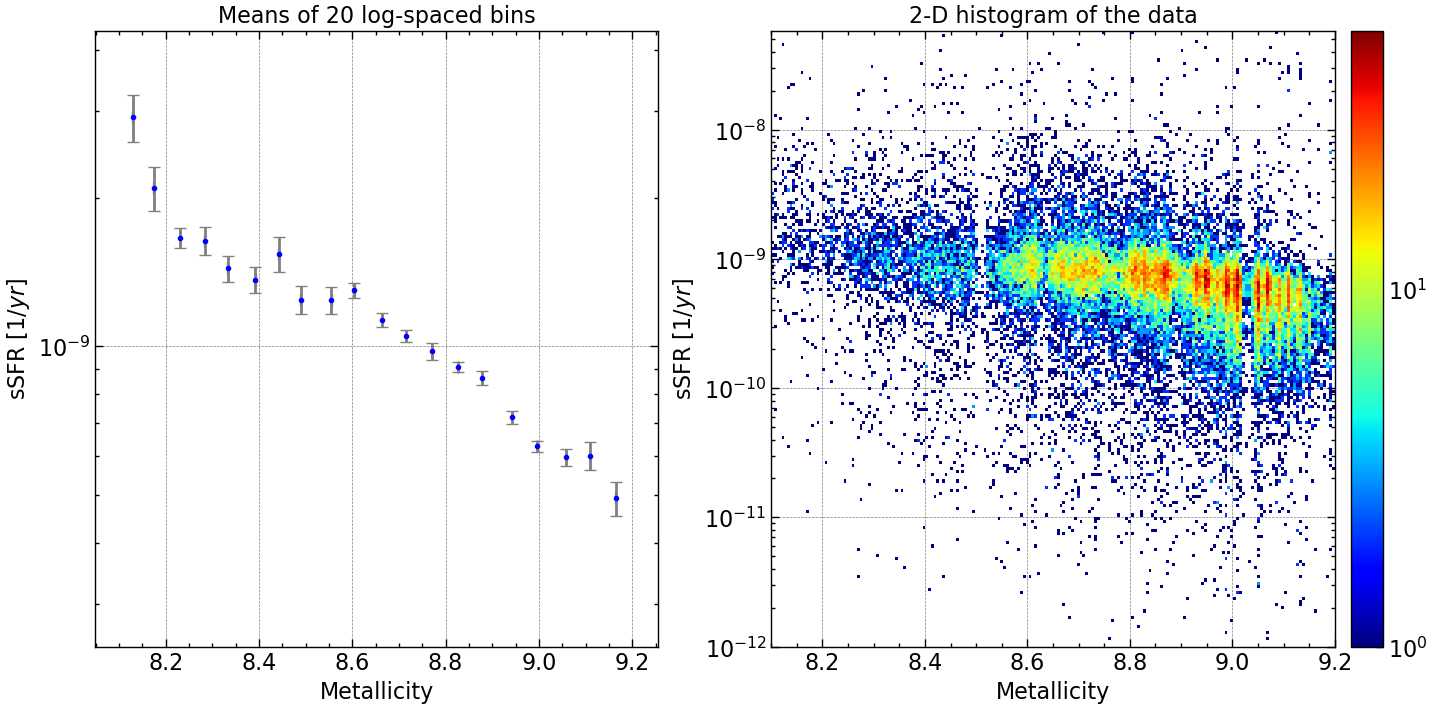

bins occupation = [ 192  204  293  476  525  724  815  594 1109 2096 2170 3043 2066 3798
 3192 3928 4778 3529 3158 1001]


In [34]:
x_data = data['log_oh'][mask]
y_data = results['bayes.sfh.sfr10Myrs'][mask]/results['best.stellar.m_star'][mask]

fig, ax, statistics = Plot(x_data, y_data, 'Metallicity', 'sSFR $[1/yr]$', xbins=20, x_min=8.1, x_max=9.2, y_min=1e-12, xlog=False);
print(f'bins occupation = {statistics[:,0].astype(int)}')

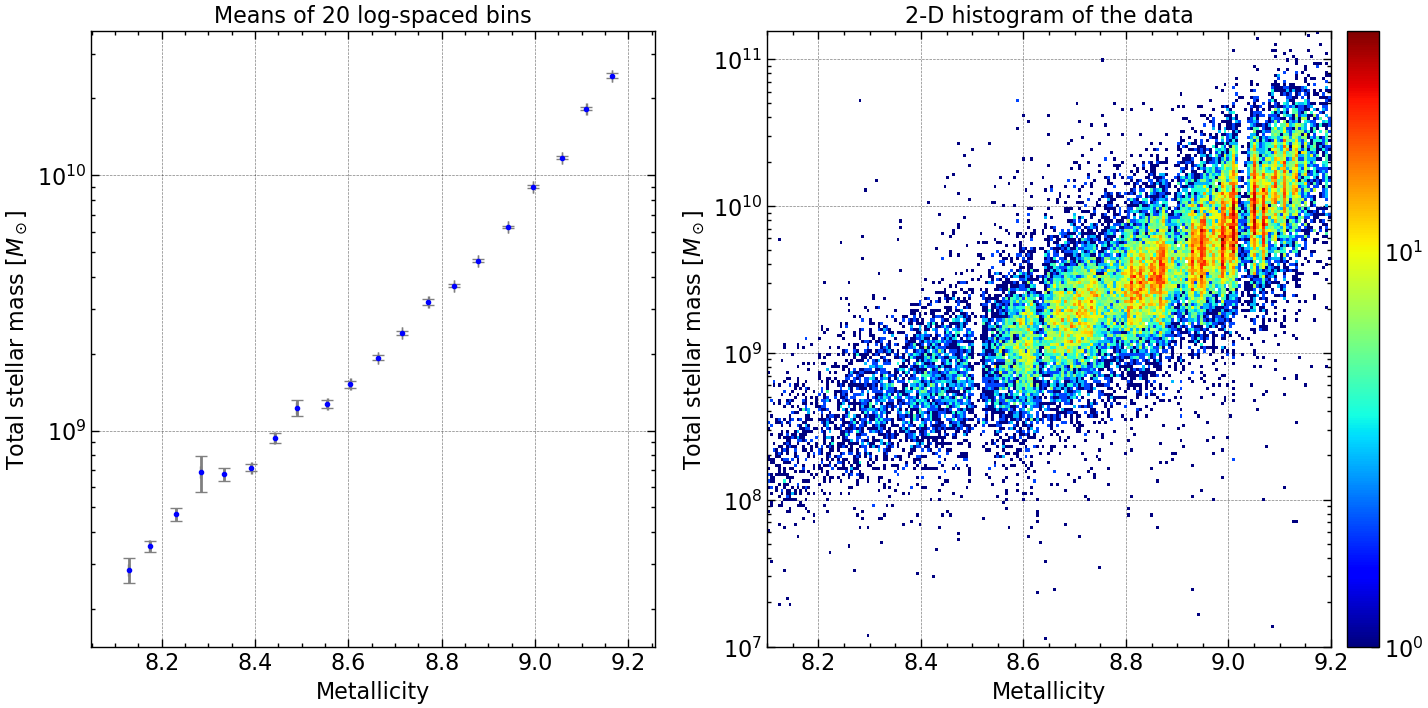

bins occupation = [ 192  204  293  476  525  724  815  594 1109 2096 2170 3043 2066 3798
 3192 3928 4778 3529 3158 1001]


In [35]:
x_data = data['log_oh'][mask]
y_data = results['best.stellar.m_star'][mask]

fig, ax, statistics = Plot(x_data, y_data, 'Metallicity', 'Total stellar mass $[M_\odot]$', xbins=20, x_min=8.1, x_max=9.2, y_min=1e7, xlog=False);
print(f'bins occupation = {statistics[:,0].astype(int)}')

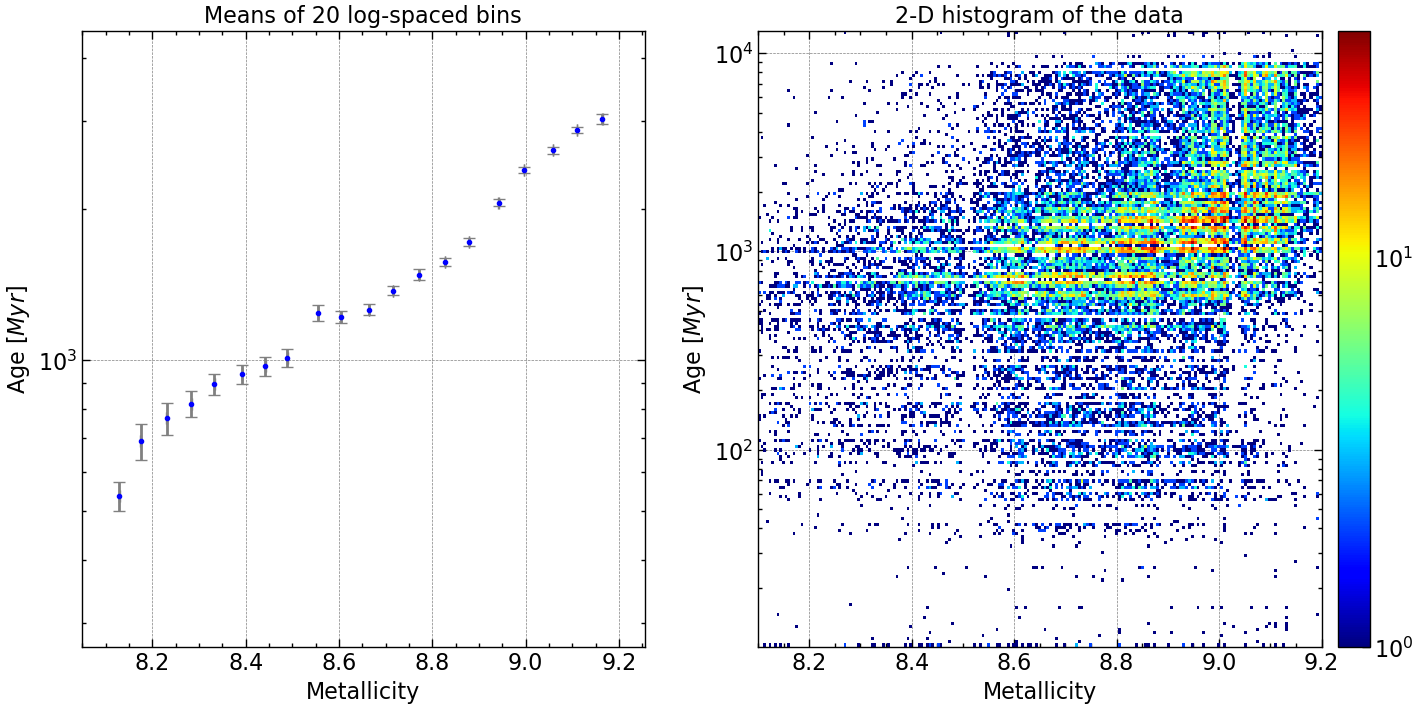

bins occupation = [ 192  204  293  476  525  724  815  594 1109 2096 2170 3043 2066 3798
 3192 3928 4778 3529 3158 1001]


In [36]:
x_data = data['log_oh'][mask]
y_data = results['best.stellar.age_m_star'][mask]

fig, ax, statistics = Plot(x_data, y_data,  'Metallicity', 'Age $[Myr]$', xbins=20, x_min=8.1, x_max=9.2, xlog=False);
print(f'bins occupation = {statistics[:,0].astype(int)}')

## AGNs

In [37]:
# This is a mask on the raw dataset (S/N > 5 for every emission line)
mask = ((data['nii_6584_flux']/data['nii_6584_flux_err'] > 5) & 
       (data['oiii_5007_flux']/data['oiii_5007_flux_err'] > 5) &
       (data['h_alpha_flux']/data['h_alpha_flux_err'] > 5) &
       (data['h_beta_flux']/data['h_beta_flux_err'] > 5))

mask = np.array(mask)

In [38]:
def model(x):
    return (0.61/(x-0.05)+1.3)

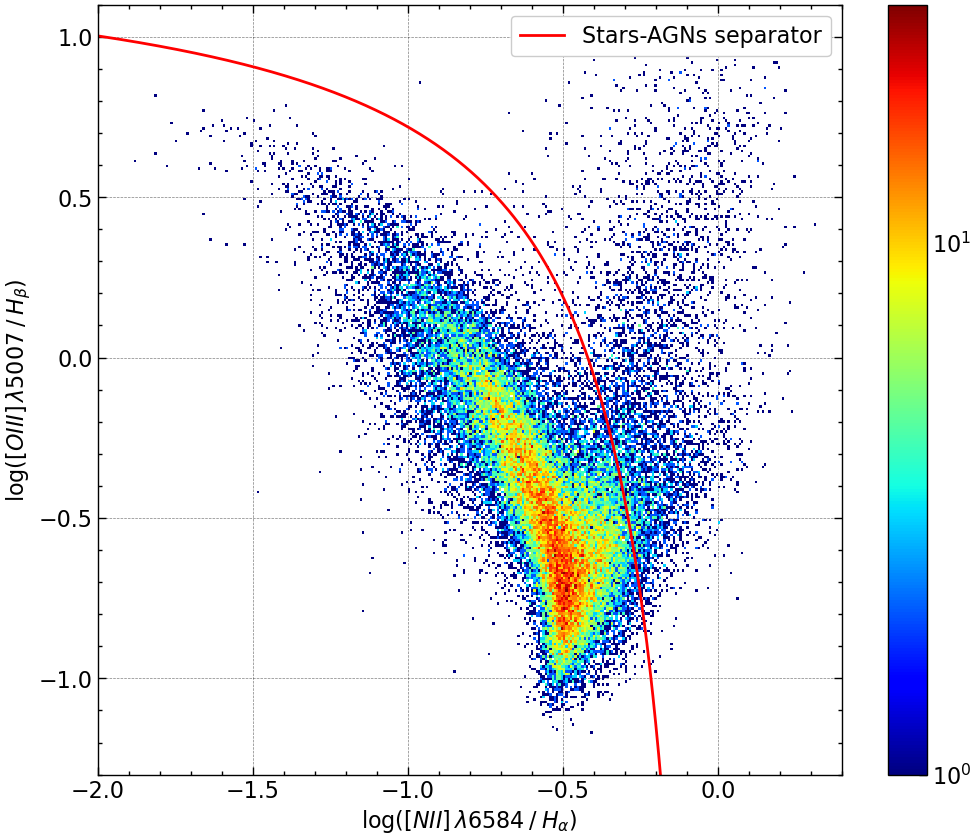

In [39]:
# Data (masked)
plt.figure(figsize=(12, 10))

x_data = np.log10(data['nii_6584_flux'][mask]/data['h_alpha_flux'][mask])
y_data = np.log10(data['oiii_5007_flux'][mask]/data['h_beta_flux'][mask])

binx = np.linspace(np.min(x_data), np.max(x_data), num=300)
biny = np.linspace(np.min(y_data), np.max(y_data), num=300)
hist = plt.hist2d(x_data, y_data, bins=(binx, biny), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
fig.colorbar(hist[3])

#-------------------------------------------
# Red line
model_r_bound = 0.049 # Analytic bound of the model (divergence point)
x_dense = np.linspace(-2, model_r_bound, int(10000)) 

plt.plot(x_dense, model(x_dense), color='red', label='Stars-AGNs separator')
plt.xlim(-2, 0.4)
plt.ylim(-1.3, 1.1)
plt.xlabel('$\log([NII] \, \lambda6584 \: / \: H_\\alpha)$')
plt.ylabel('$\log([OIII] \, \lambda5007 \: / \: H_\\beta)$')
plt.legend();

In [40]:
# Whether to run this cell or not (it takes a while, but not that much)
run_AGN_counter = False

# Whether to save the results or not
save_results = True

#------------------------------------------------------
if run_AGN_counter:
    # This is a mask on the already masked dataset: raw_data[mask][agn_mask]
    # It (will) select only AGNs, i.e. points (galaxies) above the red line
    agn_mask = np.zeros(len(data['nii_6584_flux'][mask]), dtype=bool)

    # Convert data into numpy arrays, put them into a dictionary and save the keys
    # Don't do this into the cycle because it slows down the computation
    my_data_keys = ['nii_6584_flux', 'h_alpha_flux', 'oiii_5007_flux', 'h_beta_flux']
    my_data = dict(zip(my_data_keys, [np.array(data[key]) for key in my_data_keys]))

    for i in tqdm(range(len(data['nii_6584_flux'][mask]))):
        x_temp = np.log10(my_data['nii_6584_flux'][mask][i]/my_data['h_alpha_flux'][mask][i])
        y_temp = np.log10(my_data['oiii_5007_flux'][mask][i]/my_data['h_beta_flux'][mask][i])
        
        if x_temp>model_r_bound: agn_mask[i]=True
        elif y_temp>model(x_temp): agn_mask[i]=True

    # Save the mask and the agn_mask (since the agn_mask is subordinate to the first mask)
    # One can access the file using np.load()
    if save_results:
        np.savez('SDSS_spectroscopy_masks', mask=mask, agn_mask=agn_mask)

In [41]:
# Be sure the file is updated to the current working frame, otherwise run the cell above and save the file
masks = np.load('SDSS_spectroscopy_masks.npz')
agn_mask = masks['agn_mask']

In [42]:
Nagn = np.sum(agn_mask)
Nstar = len(agn_mask)-Nagn

print('Nagn=', Nagn)
print('Nstar=', Nstar)

Nagn= 5465
Nstar= 43578


In [43]:
x_data = np.log10(data['nii_6584_flux'][mask]/data['h_alpha_flux'][mask])
y_data = np.log10(data['oiii_5007_flux'][mask]/data['h_beta_flux'][mask])
x_min = np.min(x_data)
x_max = np.max(x_data)
xbins = 20
print(len(x_data), len(agn_mask))

#bin_edges = np.logspace(start=np.log10(x_min), stop=np.log10(x_max), num=xbins+1)
bin_edges = np.linspace(start=(x_min), stop=(x_max), num=xbins+1)

statistics = np.zeros(shape=(int(xbins), 5))

for i in range(int(xbins)):
    mask_bin =((x_data>=bin_edges[i]) & (x_data<bin_edges[i+1]))
    #print(sum(mask_bin))
    indexes = np.where(mask_bin == True)
    agn_bin = agn_mask & mask_bin
    
    #print(sum(agn_bin))
    
    fraction = sum(agn_bin) / sum(mask_bin)
    #print(fraction)
    x_temp = np.array(x_data[mask_bin])
    y_temp = np.array(y_data[mask_bin])
    
    N_temp = int(len(x_temp))
    statistics[i] = np.array([N_temp, 
                              np.mean(x_temp), 
                              np.std(x_temp, ddof=1)/np.sqrt(N_temp), 
                              np.mean(y_temp), 
                              np.std(y_temp, ddof=1)/np.sqrt(N_temp)])


49043 49043


In [44]:
x_data = results['best.stellar.m_star'][mask]
print(x_min, x_max)
x_min=1e7
x_max = np.max(x_data)
xbins = 20
print(len(x_data), len(agn_mask))

bin_edges = np.logspace(start=np.log10(x_min), stop=np.log10(x_max), num=xbins+1)
#bin_edges = np.logspace(start=(x_min), stop=(x_max), num=xbins+1)

statistics = np.zeros(shape=(int(xbins), 5))
fraction = np.zeros(int(xbins))

for i in range(int(xbins)):
    mask_bin =((x_data>=bin_edges[i]) & (x_data<bin_edges[i+1]))
    print(sum(mask_bin))
    indexes = np.where(mask_bin == True)
    agn_bin = agn_mask & mask_bin
    
    #print(sum(agn_bin))
    
    fraction[i] = sum(agn_bin) / sum(mask_bin)
    print(fraction[i])
    x_temp = np.array(x_data[mask_bin])
    y_temp = np.array(y_data[mask_bin])
    
    N_temp = int(len(x_temp))
    statistics[i] = np.array([N_temp, 
                              np.mean(x_temp), 
                              np.std(x_temp, ddof=1)/np.sqrt(N_temp), 
                              np.mean(y_temp), 
                              np.std(y_temp, ddof=1)/np.sqrt(N_temp)])


-1.8830943378915985 0.3181351084915749
49043 49043
4
0.0
7
0.0
17
0.0
67
0.0
239
0.0
629
0.001589825119236884
1301
0.0007686395080707148
2372
0.0012647554806070826
3528
0.001417233560090703
5086
0.0037357451828548957
6436
0.010876320696084525
6860
0.028425655976676383
6820
0.08475073313782991
6363
0.17727487034417727
4811
0.2851797963001455
2901
0.4129610479145122
1204
0.5382059800664452
309
0.6343042071197411
57
0.6842105263157895
11
1.0


# fraction of agn in function of mass

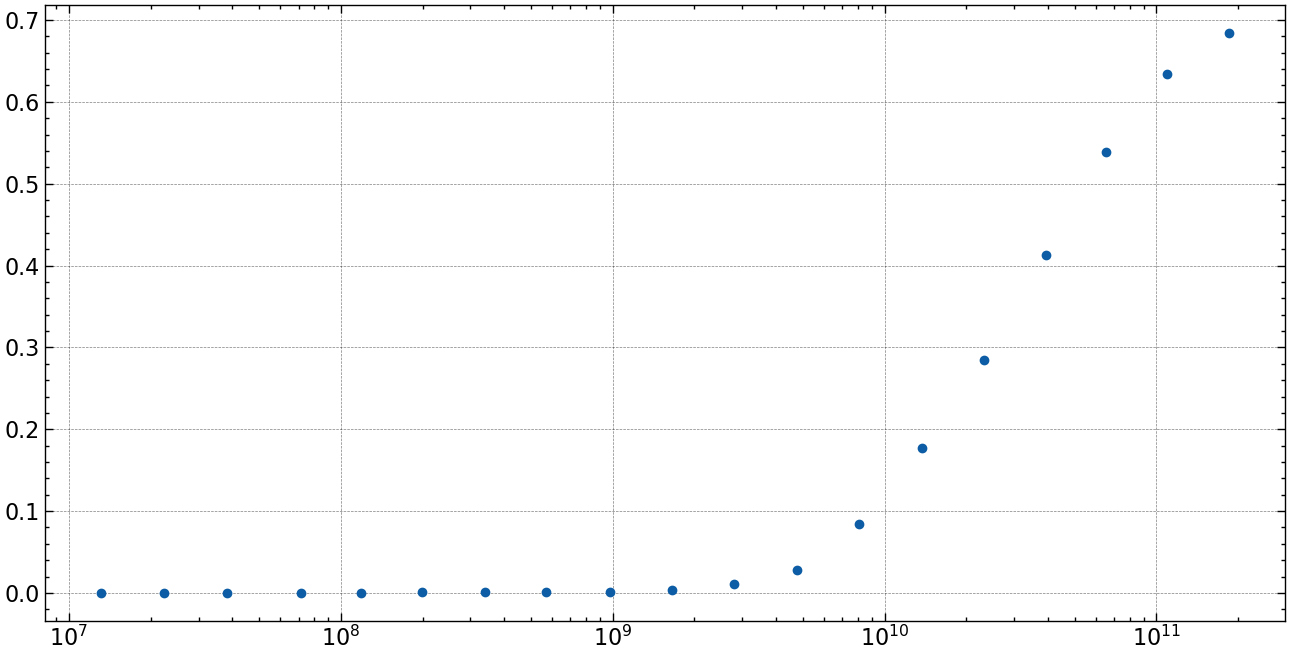

In [45]:
plt.scatter(statistics[:-1,1], fraction[:-1])
plt.xscale("log")

Search for relations between properties and agn

Text(0, 0.5, 'sSFR $[1/yr]$')

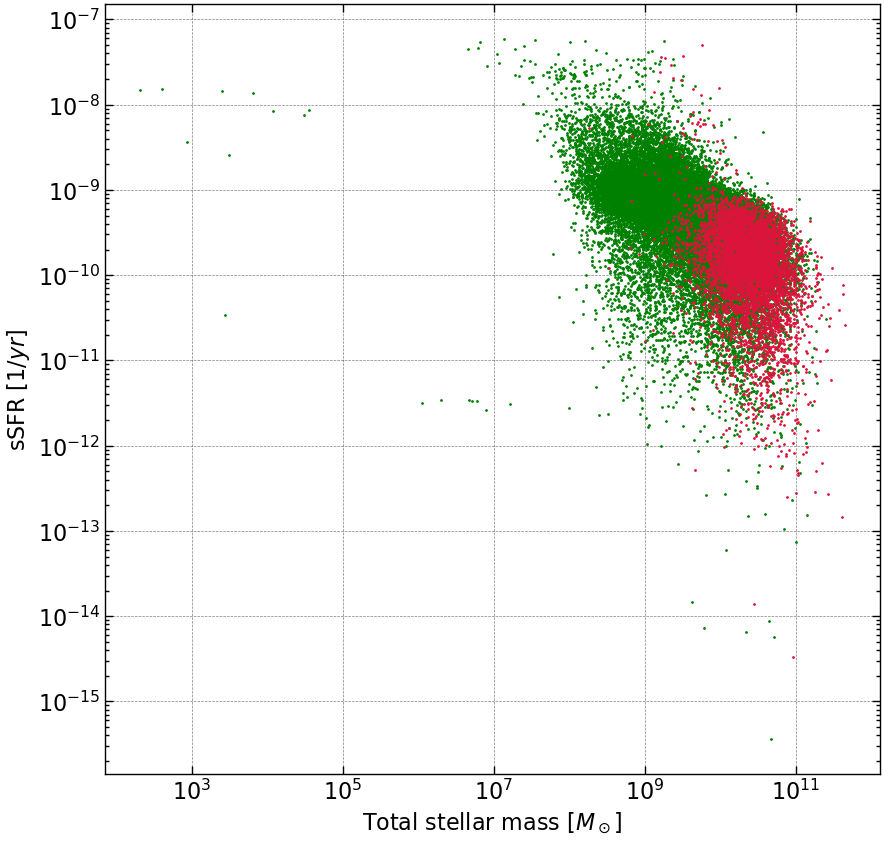

In [46]:
x_data = results['best.stellar.m_star'][mask]
y_data = results['bayes.sfh.sfr10Myrs'][mask]/results['best.stellar.m_star'][mask]

plt.rcParams['figure.figsize'] = [10 , 10]
fig, ax = plt.subplots(1, 1)
ax.scatter(x_data[~agn_mask], y_data[~agn_mask], s=1, color='green')
ax.scatter(x_data[agn_mask], y_data[agn_mask], s=1, color='crimson')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Total stellar mass $[M_\odot]$')
ax.set_ylabel('sSFR $[1/yr]$')